In [2]:
import pandas as pd

trades = pd.read_csv("historical_data.csv")
sentiment = pd.read_csv("fear_greed_index.csv")

/tmp/ipython-input-4266696116.py:3: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  trades = pd.read_csv("historical_data.csv")


In [3]:
trades['Timestamp IST'] = pd.to_datetime(trades['Timestamp IST'], format='%d-%m-%Y %H:%M')
sentiment['date'] = pd.to_datetime(sentiment['date'])
trades['date'] = trades['Timestamp IST'].dt.date
sentiment['date'] = sentiment['date'].dt.date

print(trades[['Timestamp IST', 'date']].head())
print(sentiment[['date']].head())

        Timestamp IST        date
0 2024-12-02 22:50:00  2024-12-02
1 2024-12-02 22:50:00  2024-12-02
2 2024-12-02 22:50:00  2024-12-02
3 2024-12-02 22:50:00  2024-12-02
4 2024-12-02 22:50:00  2024-12-02
         date
0  2018-02-01
1  2018-02-02
2  2018-02-03
3  2018-02-04
4  2018-02-05


In [4]:
merged = pd.merge(
    trades,
    sentiment,
    on='date',
    how='left'
)

print("Merged DataFrame shape:", merged.shape)
print(merged[['date','classification']].head(10))

Merged DataFrame shape: (79166, 20)
         date classification
0  2024-12-02  Extreme Greed
1  2024-12-02  Extreme Greed
2  2024-12-02  Extreme Greed
3  2024-12-02  Extreme Greed
4  2024-12-02  Extreme Greed
5  2024-12-02  Extreme Greed
6  2024-12-02  Extreme Greed
7  2024-12-02  Extreme Greed
8  2024-12-02  Extreme Greed
9  2024-12-02  Extreme Greed


# **Sentiment Distribution**

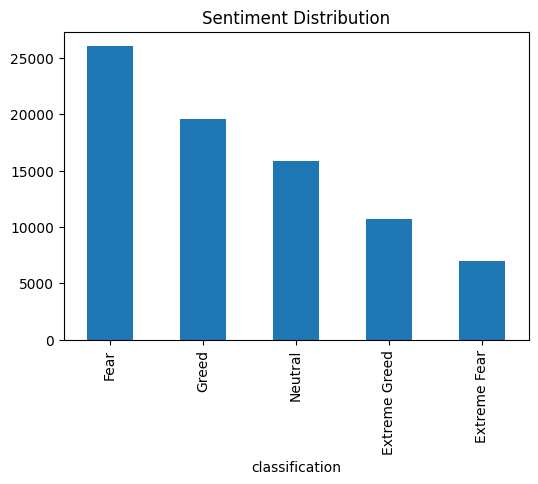

In [6]:
import matplotlib.pyplot as plt

merged['classification'].value_counts().plot(kind='bar', figsize=(6,4), title="Sentiment Distribution")
plt.show()

# **Average Closed PnL by sentiment**

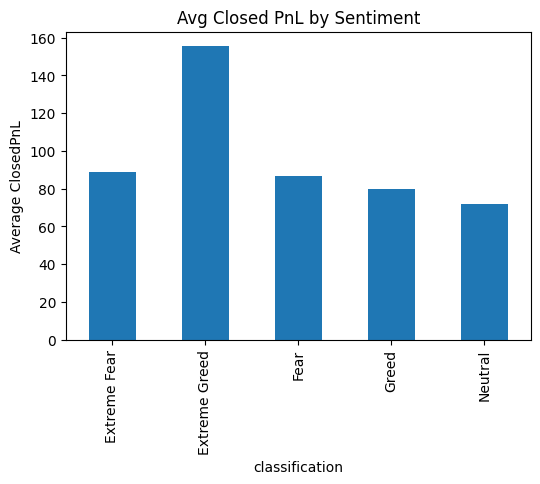

In [7]:
merged.groupby('classification')['Closed PnL'].mean().plot(kind='bar', figsize=(6,4), title="Avg Closed PnL by Sentiment")
plt.ylabel("Average ClosedPnL")
plt.show()

# **Average Trade size by Sentiment**

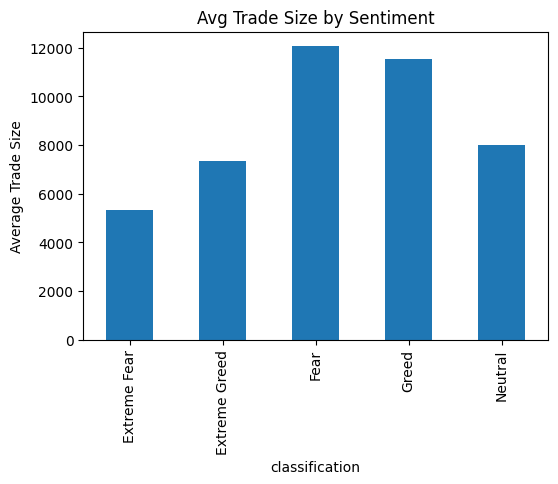

In [8]:
merged.groupby('classification')['Size USD'].mean().plot(kind='bar', figsize=(6,4), title="Avg Trade Size by Sentiment")
plt.ylabel("Average Trade Size")
plt.show()

# **Win Rate % by Sentiment**

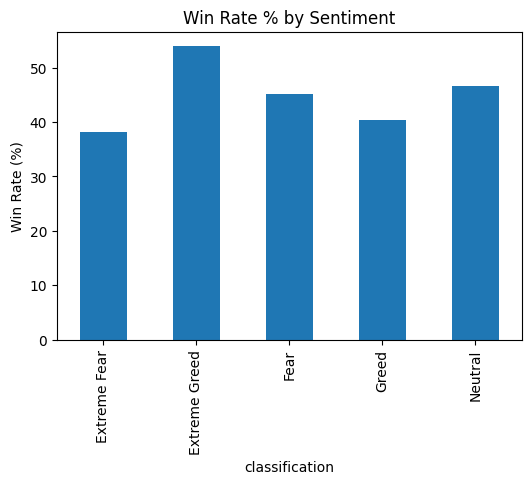

In [9]:
win_rate = merged.groupby('classification')['Closed PnL'].apply(lambda x: (x > 0).mean() * 100)

win_rate.plot(kind='bar', figsize=(6,4), title="Win Rate % by Sentiment")
plt.ylabel("Win Rate (%)")
plt.show()

# **PnL Risk by Sentiment**

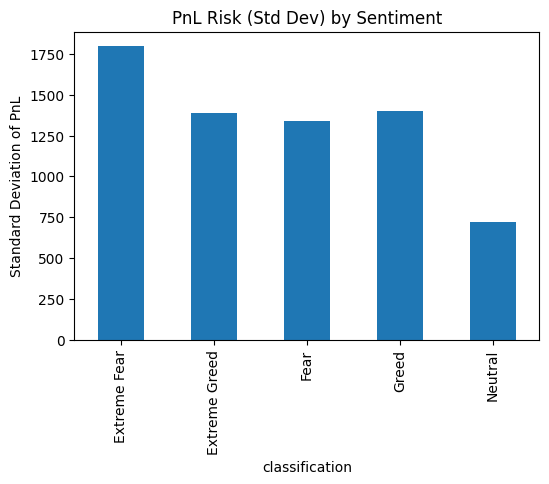

In [10]:
risk = merged.groupby('classification')['Closed PnL'].std()

risk.plot(kind='bar', figsize=(6,4), title="PnL Risk (Std Dev) by Sentiment")
plt.ylabel("Standard Deviation of PnL")
plt.show()

# **Total Trading Volume by Sentiment**

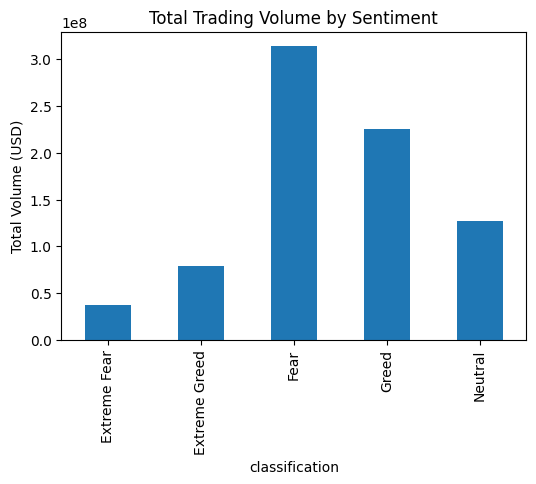

In [11]:
total_volume = merged.groupby('classification')['Size USD'].sum()

total_volume.plot(kind='bar', figsize=(6,4), title="Total Trading Volume by Sentiment")
plt.ylabel("Total Volume (USD)")
plt.show()



# Avg Trade Size vs Sentiment

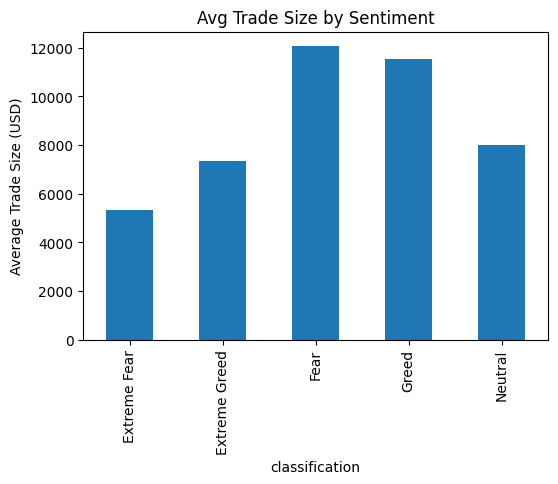

In [12]:
merged.groupby("classification")["Size USD"].mean().plot(kind="bar", figsize=(6,4), title="Avg Trade Size by Sentiment")
plt.ylabel("Average Trade Size (USD)")
plt.show()


# Avg Closed PnL vs Sentiment

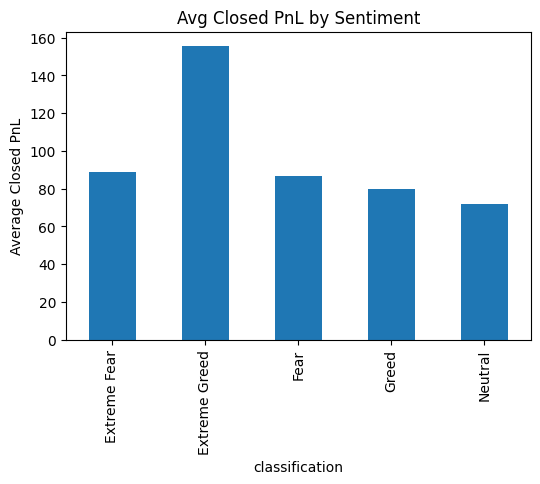

In [13]:
merged.groupby("classification")["Closed PnL"].mean().plot(kind="bar", figsize=(6,4), title="Avg Closed PnL by Sentiment")
plt.ylabel("Average Closed PnL")
plt.show()

# Trade Direction distribution vs Sentiment

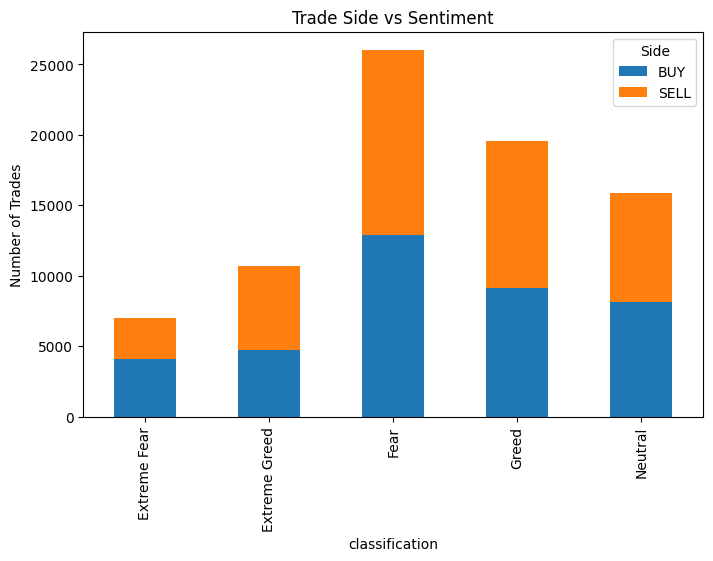

In [14]:
merged.groupby(["classification", "Side"]).size().unstack().plot(kind="bar", stacked=True, figsize=(8,5), title="Trade Side vs Sentiment")
plt.ylabel("Number of Trades")
plt.show()


# **Conclusion**

In [16]:
print("Conclusion\n")

# Avg PnL by sentiment
avg_pnl = merged.groupby("classification")["Closed PnL"].mean()

# Avg Trade Size by sentiment
avg_size = merged.groupby("classification")["Size USD"].mean()

# Side distribution
side_dist = merged.groupby(["classification", "Side"]).size()

# Print findings
print("1. Profitability vs Sentiment:")
for sentiment, val in avg_pnl.items():
    print(f"   - {sentiment}: Avg Closed PnL = {val:.2f}")

print("\n2. Trade Size vs Sentiment:")
for sentiment, val in avg_size.items():
    print(f"   - {sentiment}: Avg Trade Size (USD) = {val:.2f}")

print("\n3. Positioning Behavior:")
print(side_dist)



Conclusion

1. Profitability vs Sentiment:
   - Extreme Fear: Avg Closed PnL = 89.13
   - Extreme Greed: Avg Closed PnL = 155.42
   - Fear: Avg Closed PnL = 86.82
   - Greed: Avg Closed PnL = 79.99
   - Neutral: Avg Closed PnL = 71.88

2. Trade Size vs Sentiment:
   - Extreme Fear: Avg Trade Size (USD) = 5338.79
   - Extreme Greed: Avg Trade Size (USD) = 7353.76
   - Fear: Avg Trade Size (USD) = 12058.99
   - Greed: Avg Trade Size (USD) = 11526.26
   - Neutral: Avg Trade Size (USD) = 7992.58

3. Positioning Behavior:
classification  Side
Extreme Fear    BUY      4101
                SELL     2908
Extreme Greed   BUY      4724
                SELL     5980
Fear            BUY     12903
                SELL    13121
Greed           BUY      9148
                SELL    10419
Neutral         BUY      8152
                SELL     7703
dtype: int64
